### **Metode Korelasi**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/student_lifestyle_dataset.csv')
df.head()


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
# Mengganti Nama Variabel
df.rename(columns={"Study_Hours_Per_Day":"x1", "Extracurricular_Hours_Per_Day":"x2", "Sleep_Hours_Per_Day":"x3", "Social_Hours_Per_Day":"x4", "Physical_Activity_Hours_Per_Day":"x5", "GPA":"y"}, inplace=True)
df.head()

,Student_ID,x1,x2,x3,x4,x5,y,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
df.drop(columns=['Stress_Level'], inplace=True)

In [ ]:
# Menghitung Nilai Korelasi Pearson
from scipy.stats import pearsonr

# Convert dataframe into series
list1 = df["x1"]
list2 = df["x2"]
list3 = df["x3"]
list4 = df["x4"]
list5 = df["x5"]
list6 = df["y"]
corr, _ = pearsonr(list1, list6)
print('Pearsons correlation: %.5f' % (corr))


Pearsons correlation: 0.73447


Korelasi Pearson mengukur kekuatan dan arah hubungan linear antara dua variabel numerik.

In [ ]:
# Korelasi Biserial
import scipy.stats as stats
stats.pointbiserialr(df["x1"], df["y"])
stats.pointbiserialr(df["x2"], df["y"])
stats.pointbiserialr(df["x3"], df["y"])
stats.pointbiserialr(df["x4"], df["y"])
stats.pointbiserialr(df["x5"], df["y"])



SignificanceResult(statistic=-0.3411524640099619, pvalue=1.0809883562126855e-55)

Korelasi biserial digunakan ketika salah satu variabel bersifat kontinu (numerik) dan variabel lainnya bersifat dikotomi (biner, misalnya 0 atau 1). Korelasi ini mengukur kekuatan hubungan antara kedua variabel tersebut.

# **Interpretasi**



1.  **Korelasi Pearson:** Hasil perhitungan korelasi Pearson menunjukkan seberapa kuat hubungan linear antara dua variabel numerik dalam dataset. Nilai yang mendekati 1 atau -1 mengindikasikan hubungan yang kuat, sedangkan nilai yang mendekati 0 mengindikasikan tidak ada hubungan linear yang signifikan.
2.  **Korelasi Biserial:** Hasil perhitungan korelasi biserial menunjukkan kekuatan hubungan antara variabel kontinu dan variabel dikotomi. Nilai yang lebih besar (mendekati 1 atau -1) mengindikasikan hubungan yang lebih kuat.

Interpretasi hasil korelasi harus dilakukan dengan hati-hati. Korelasi tidak sama dengan kausalitas. Artinya, meskipun dua variabel memiliki korelasi yang tinggi, tidak berarti bahwa satu variabel menyebabkan perubahan pada variabel lainnya. Ada kemungkinan adanya variabel lain yang memengaruhi keduanya atau faktor kebetulan.


###**Model Regresi**

In [ ]:
# Memodelkan dengan regresi linear berganda
import numpy as np
import statsmodels.formula.api as smf
df_with_dummies = pd.get_dummies(data=df, columns=["Student_ID"])
x = df_with_dummies[["x1", "x2", "x3", "x4", "x5"]]
y = df_with_dummies["y"]
reg_mod = "y ~ x1 + x2 + x3 + x4 + x5"

model = smf.ols(formula=reg_mod, data=df_with_dummies).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     587.8
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:14:55   Log-Likelihood:                 358.07
No. Observations:                2000   AIC:                            -706.1
Df Residuals:                    1995   BIC:                            -678.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0232      0.000    154.922      0.0

Berdasarkan hasil analisis regresi, dapat disimpulkan bahwa model regresi linear berganda yang dibangun dapat menjelaskan sekitar 54.1% variabilitas dalam variabel dependen. Semua variabel independen (x1, x2, x3, x4, x5) memiliki pengaruh yang signifikan terhadap variabel dependen.

### Metode Klasifikasi

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
dataset = pd.read_csv("//content//student_lifestyle_dataset.csv")
dataset.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
# Menampilkan columns data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [ ]:
# Mengetahui apakah ada data kosong
dataset.empty

False

In [ ]:
en = LabelEncoder()

dataset["Stress_Level"] = en.fit_transform(dataset["Stress_Level"])
dataset.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,2
1,2,5.3,3.5,8.0,4.2,3.0,2.75,1
2,3,5.1,3.9,9.2,1.2,4.6,2.67,1
3,4,6.5,2.1,7.2,1.7,6.5,2.88,2
4,5,8.1,0.6,6.5,2.2,6.6,3.51,0


In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
x

array([[1.000e+00, 6.900e+00, 3.800e+00, ..., 2.800e+00, 1.800e+00,
        2.990e+00],
       [2.000e+00, 5.300e+00, 3.500e+00, ..., 4.200e+00, 3.000e+00,
        2.750e+00],
       [3.000e+00, 5.100e+00, 3.900e+00, ..., 1.200e+00, 4.600e+00,
        2.670e+00],
       ...,
       [1.998e+03, 6.200e+00, 0.000e+00, ..., 8.000e-01, 1.080e+01,
        3.140e+00],
       [1.999e+03, 8.100e+00, 7.000e-01, ..., 3.500e+00, 4.100e+00,
        3.040e+00],
       [2.000e+03, 9.000e+00, 1.700e+00, ..., 3.100e+00, 2.900e+00,
        3.580e+00]])

In [ ]:
y

array([2, 1, 1, ..., 2, 0, 0])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  1600
x_test =  400
y_train =  1600
y_test =  400


In [ ]:
# Mengskalakan data
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.44358348, -0.26904367, -1.20144885, ...,  0.24238655,
         0.22276103, -1.10110269],
       [-0.49091397, -0.55192184,  0.77792697, ...,  1.72351427,
        -1.53930377, -0.19725614],
       [-1.37368647, -1.54199546,  1.63852516, ...,  1.36804361,
        -1.5793507 , -0.13030454],
       ...,
       [ 0.68841492,  0.08455405, -0.34085067, ..., -1.29798627,
         0.82346495, -0.76634471],
       [ 0.65910411,  1.56966448,  1.20822607, ..., -1.4757216 ,
        -0.89855293,  1.37610637],
       [ 0.90910804, -1.32983683, -1.11538904, ...,  0.89408275,
        -0.2578021 , -1.23500588]])

In [ ]:
x_test

array([[ 0.57806836,  1.00390813, -0.34085067, ..., -1.12025095,
         0.06257332,  0.60616301],
       [ 0.5711717 , -0.4812023 ,  0.86398679, ...,  1.30879851,
        -1.1388345 , -0.43158673],
       [-1.40989394,  1.07462767,  0.69186715, ...,  0.42012188,
        -0.77841215,  0.40530823],
       ...,
       [-1.18575248, -0.55192184,  1.63852516, ...,  0.95332785,
        -1.37911606, -0.9671995 ],
       [-1.18402831, -1.25911728,  1.20822607, ..., -0.05383899,
        -0.65827137,  0.03707445],
       [ 0.50910175,  1.56966448, -1.37356849, ...,  1.66426916,
        -1.41916299,  2.04562233]])

In [ ]:
y_train

array([2, 2, 1, ..., 2, 0, 1])

In [ ]:
y_test

array([0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1,
       0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 0,
       1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1,
       0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 2,

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1,
       1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 1, 0, 2, 2, 0, 1, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0,
       2, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2,
       2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2,

In [ ]:
# Hasil Prediksi Probabilitas
classifier.predict_proba(x_test)

array([[9.92193236e-01, 3.24003449e-35, 7.80676434e-03],
       [1.09542794e-01, 2.76571141e-06, 8.90454440e-01],
       [9.98619057e-01, 1.78524139e-37, 1.38094279e-03],
       ...,
       [1.03943318e-01, 5.81819806e-05, 8.95998500e-01],
       [1.01269981e-01, 6.49607520e-01, 2.49122499e-01],
       [9.99998136e-01, 3.20976766e-55, 1.86390675e-06]])

In [ ]:
# Evaluasi
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[164  18  11]
 [  0  59   4]
 [ 27   4 113]]


**Interpretasi**



*   Diagonal: Nilai pada diagonal menunjukkan jumlah sampel yang diklasifikasikan dengan benar.
*   Non-diagonal: Nilai di luar diagonal menunjukkan jumlah sampel yang salah diklasifikasikan.
*  Contoh: Nilai 164 pada baris pertama dan kolom pertama berarti ada 164 sampel dari kelas 0 yang berhasil diklasifikasikan sebagai kelas 0.






In [ ]:
akurasi = classification_report(y_test, y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       193
           1       0.73      0.94      0.82        63
           2       0.88      0.78      0.83       144

    accuracy                           0.84       400
   macro avg       0.82      0.86      0.83       400
weighted avg       0.85      0.84      0.84       400



# **Interpretasi Keseluruhan**

Akurasi: Model berhasil mengklasifikasikan sekitar 84% dari data uji dengan benar.

*   Akurasi: Model berhasil mengklasifikasikan sekitar 84% dari data uji dengan benar.
*   Precision, Recall, dan F1-score: Nilai precision, recall, dan F1-score yang cukup tinggi untuk setiap kelas menunjukkan bahwa model memiliki kemampuan yang baik dalam mengidentifikasi sampel positif dan negatif.

*   Matriks Konfusi: Matriks konfusi menunjukkan bahwa model cenderung lebih baik dalam mengklasifikasikan kelas 0 dan 2 dibandingkan dengan kelas 1.




### Diperoleh hasil klasifikasi Naives Bayes yaitu 0.84

In [ ]:
akurasi = accuracy_score(y_test, y_pred)
print("Tingkat Akurasi : %d persen"%(akurasi*100))

Tingkat Akurasi : 84 persen


### Diperoleh akurasi skore yaitu 84%

In [ ]:
ydata = pd.DataFrame()
ydata["y_test"] = pd.DataFrame(y_test)
ydata["y_pred"] = pd.DataFrame(y_pred)
ydata

,y_test,y_pred
0,0,0
1,2,2
2,0,0
3,0,2
4,0,0
...,...,...
395,2,2
396,1,1
397,2,2
398,1,1


In [ ]:
ydata.to_csv("DataActualPrediksi.csv", index=False)

## **Interpretasi**


*   Perbandingan y_test dan y_pred: Dengan membandingkan nilai y_test dan y_pred secara baris per baris, Anda dapat melihat secara detail mana saja prediksi yang benar dan mana yang salah.
*   Matriks Konfusi: Untuk mendapatkan gambaran yang lebih lengkap tentang kinerja model, Anda dapat membuat matriks konfusi. Matriks konfusi akan menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.


## **Hasil dan Kesimpulan**



1.   **Identifikasi Pola:**

     Clustering mengungkapkan adanya pola tertentu dalam gaya hidup mahasiswa yang memengaruhi GPA dan keseimbangan hidup.
     Contohnya, mahasiswa dengan waktu belajar terstruktur dan tidur cukup cenderung memiliki performa akademik yang lebih baik.
2.   **Pendekatan Personalisasi:**

     Kluster ini memungkinkan institusi untuk mengembangkan kebijakan atau intervensi yang sesuai dengan kebutuhan masing-masing kelompok mahasiswa.
     Misalnya, mahasiswa dengan waktu tidur rendah dapat diarahkan untuk manajemen waktu yang lebih baik.
3. **Dampak Praktis:**

     Analisis ini dapat mendukung perencanaan program kampus yang lebih efektif, seperti bimbingan akademik, program kesehatan, atau aktivitas sosial.

In [ ]:
print(df.keys())

Index(['Student_ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'y'], dtype='object')


In [ ]:
df.head()

,Student_ID,x1,x2,x3,x4,x5,y
0,1,6.9,3.8,8.7,2.8,1.8,2.99
1,2,5.3,3.5,8.0,4.2,3.0,2.75
2,3,5.1,3.9,9.2,1.2,4.6,2.67
3,4,6.5,2.1,7.2,1.7,6.5,2.88
4,5,8.1,0.6,6.5,2.2,6.6,3.51


In [ ]:
print(df.columns)

Index(['Student_ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'y'], dtype='object')


In [ ]:
print(df.head())

   Student_ID   x1   x2   x3   x4   x5     y
0           1  6.9  3.8  8.7  2.8  1.8  2.99
1           2  5.3  3.5  8.0  4.2  3.0  2.75
2           3  5.1  3.9  9.2  1.2  4.6  2.67
3           4  6.5  2.1  7.2  1.7  6.5  2.88
4           5  8.1  0.6  6.5  2.2  6.6  3.51


In [ ]:
df.isna().sum()

,0
Student_ID,0
x1,0
x2,0
x3,0
x4,0
x5,0
y,0


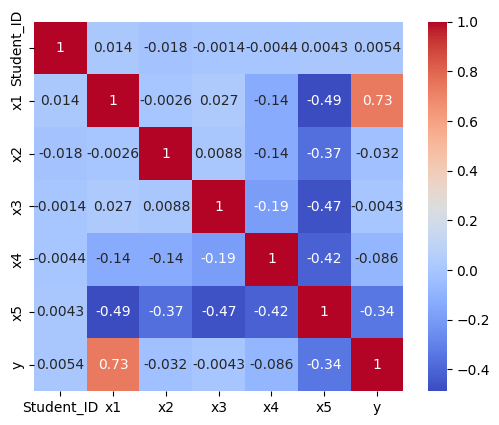

In [ ]:
# Plotting heatmap for overal data set
sns.heatmap(df.corr(), square=True, annot=True, cmap='coolwarm')
plt.show()

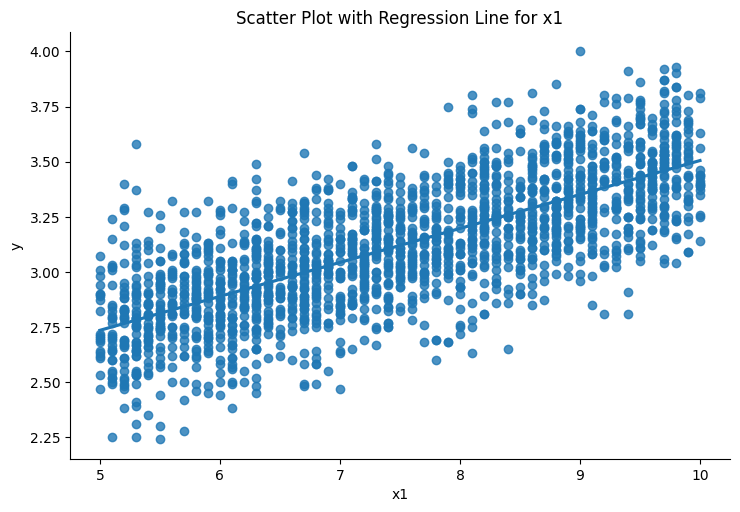

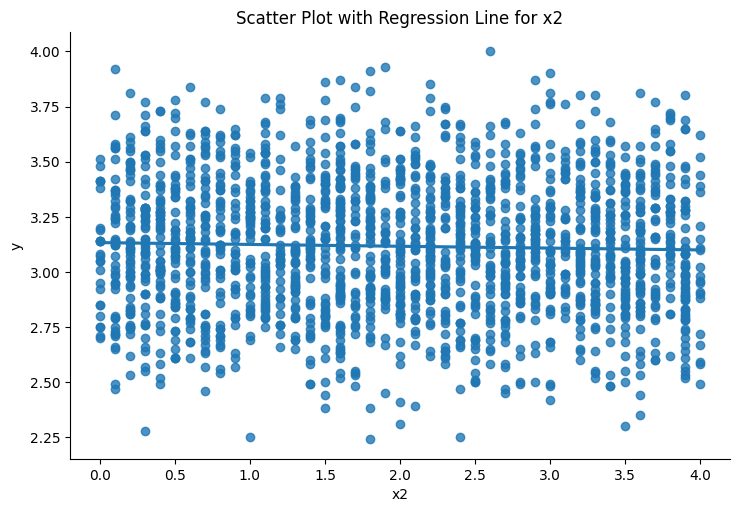

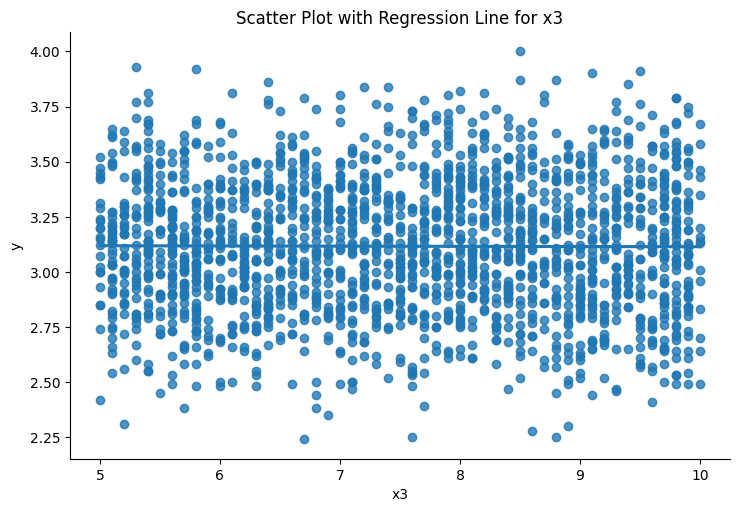

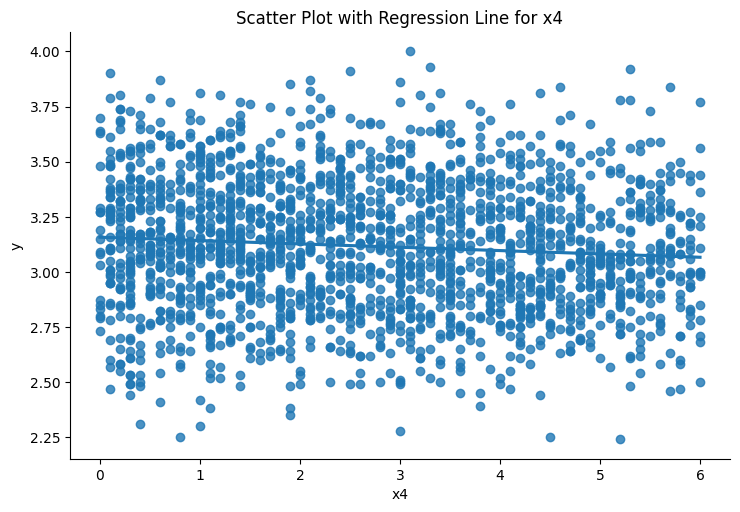

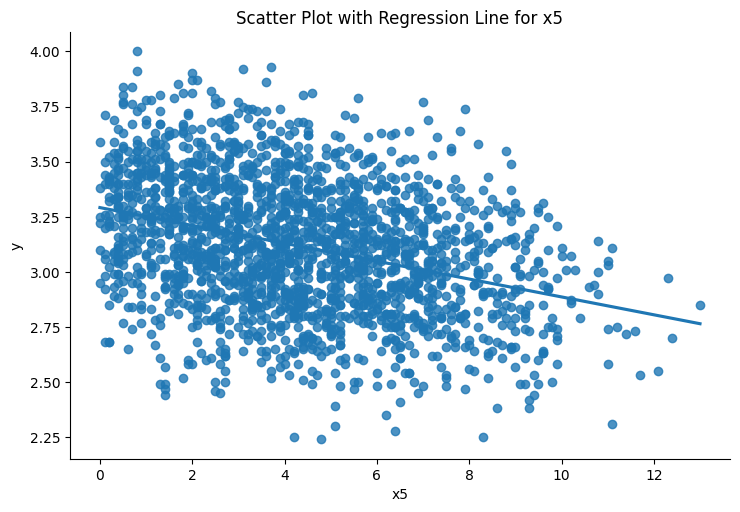

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar kolom untuk x
x_columns = ["x1", "x2", "x3", "x4", "x5"]

# Buat scatter plot dengan garis regresi untuk setiap kolom
for col in x_columns:
    plot = sns.lmplot(x=col, y="y", data=df, height=5, aspect=1.5, ci=None)  # `ci=None` untuk menghapus interval kepercayaan
    plt.title(f"Scatter Plot with Regression Line for {col}")
    plt.xlabel(col)
    plt.ylabel("y")
    plt.show()


In [ ]:
# preparing data
x = df[["x1", "x2", "x3", "x4", "x5"]]
y = df["y"]

In [ ]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [ ]:
# Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# Fitting the training data to our model
regressor.fit(x_train, y_train)


LinearRegression()

In [ ]:
# Model Evaluation
regressor.score(x_test, y_test)

0.5229294387787269

The accuracy of this model is 52%.

In [ ]:
# Predict the y values
y_pred=regressor.predict(x_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({"Actual": y_test.values.flatten(),
"predicted": y_pred.flatten()})
evaluate.head(10)

,Actual,predicted
0,3.45,3.404960
1,3.77,3.384943
2,3.29,3.171388
3,2.61,2.755556
4,2.95,2.858131
5,3.36,3.120781
6,3.05,3.332719
7,3.38,3.272580
8,2.58,2.788015
9,3.54,3.269002


<Axes: >

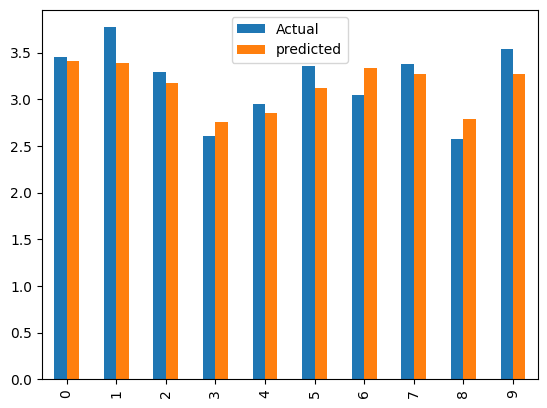

In [ ]:
evaluate.head(10).plot(kind = "bar")

**Kesimpulan**

Grafik perbandingan nilai aktual dan prediksi memberikan gambaran visual yang cepat tentang kinerja model. Namun, untuk mendapatkan pemahaman yang lebih komprehensif, kita perlu menganalisis hasil secara lebih detail menggunakan metrik evaluasi dan teknik visualisasi lainnya.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [ ]:
# R2 Score
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.5229294387787269


In [ ]:
# Mean Absolute Error (MAE)
print(f"MSE Score: {mean_absolute_error(y_test, y_pred)}")

MSE Score: 0.1598704423376779


In [ ]:
# Mean Squared Error (MSE)
print(f"MSE Score: {mean_squared_error(y_test, y_pred)}")

MSE Score: 0.041295509250944516


### **Interpretasi**



*   **Model memiliki kinerja yang cukup baik:** Nilai R-squared yang cukup tinggi menunjukkan bahwa model mampu menjelaskan sebagian besar variabilitas dalam data.

*   **Masih ada ruang untuk perbaikan:** Nilai MAE dan MSE menunjukkan bahwa masih ada beberapa kesalahan dalam prediksi model.

*   **Perlu analisis lebih lanjut:** Untuk mendapatkan pemahaman yang lebih baik tentang kinerja model, perlu dilakukan analisis lebih lanjut, seperti:
    *   **Visualisasi**: Membuat plot perbandingan antara nilai aktual dan nilai prediksi untuk melihat pola kesalahan.
    *   **Analisis residual**: Menganalisis residual (selisih antara nilai aktual dan nilai prediksi) untuk melihat apakah ada pola atau tren tertentu.
    *   **Feature engineering:** Mencoba menambahkan atau mengubah fitur untuk meningkatkan kinerja model.
    *   **Tuning hyperparameter:** Menyesuaikan parameter model untuk mendapatkan hasil yang lebih baik.




